# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

# Importing Libraries

In [140]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Importing Dataset

In [141]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [142]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [143]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [144]:
train.duplicated().sum()

220

### There are 220 Duplicate values present in the data

In [145]:
test.duplicated().sum()

26

## There are 26 Duplicate values in test set

In [146]:
# dropping duplicate values from train set only

train.drop_duplicates(keep=False,inplace=True)

# Combine both the set for Feature Engineering and Analysis

In [147]:
flight_data= train.append(test,sort= False)

# Understanding the Data

In [148]:
flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [149]:
flight_data.shape

(12939, 11)

### Checking for null values

In [150]:
flight_data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

# Data Analysis
## We will be doing this on our Train data only

In [151]:
train['Airline'].value_counts() ## checking for airline data

Jet Airways                          3569
IndiGo                               2033
Air India                            1645
Multiple carriers                    1196
SpiceJet                              812
Vistara                               477
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Let's see the relation b/w airline and price

<function matplotlib.pyplot.show(close=None, block=None)>

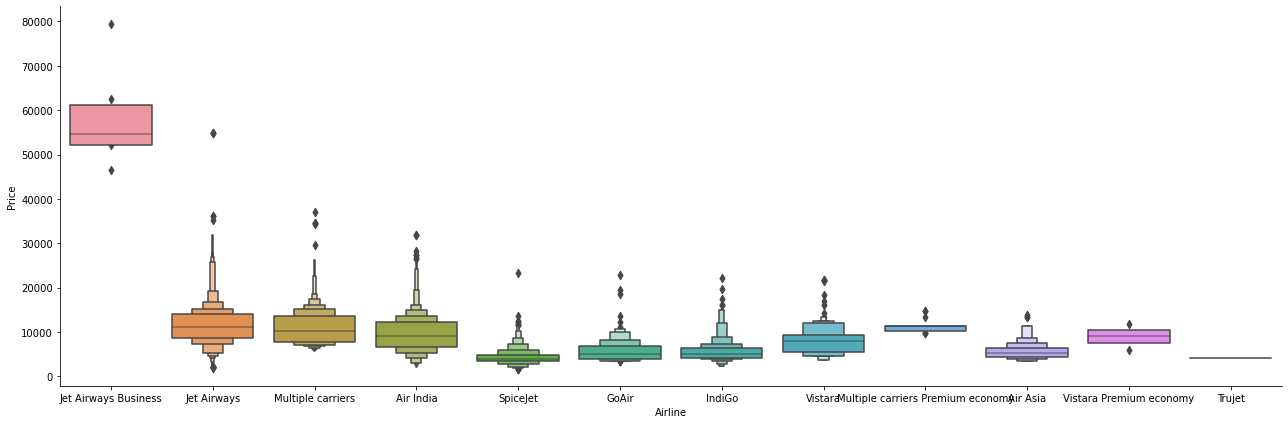

In [152]:
sns.catplot(y='Price',x='Airline',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Jet airways business have the highest fare

In [153]:
train['Source'].value_counts() ## checking for Source

Delhi       4179
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Finding relation b/w Source and price

<function matplotlib.pyplot.show(close=None, block=None)>

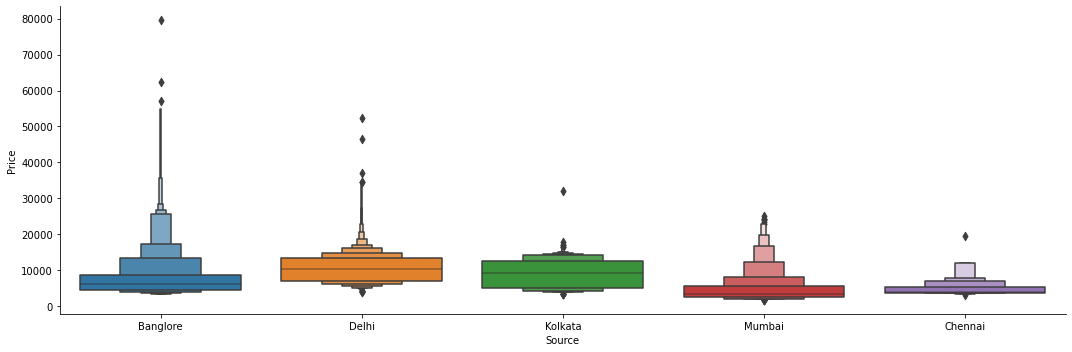

In [154]:
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=5, aspect=3)
plt.show

### High values in Banglore and Delhi 

### High chances of Having Outliers

In [155]:
train['Destination'].value_counts() ## checking for Destination

Cochin       4179
Banglore     2850
Delhi        1265
New Delhi     896
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### Finding relation b/w Destination and price

<function matplotlib.pyplot.show(close=None, block=None)>

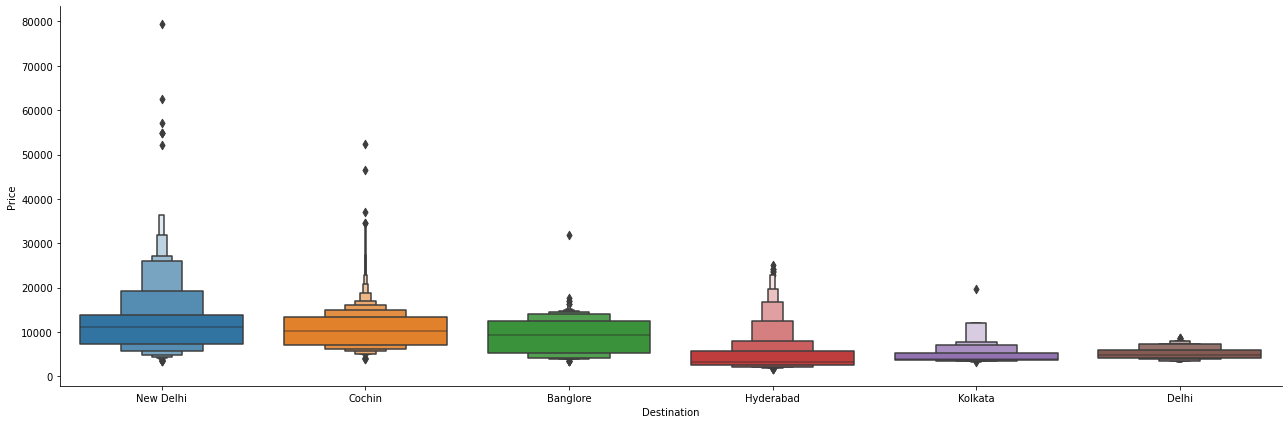

In [156]:
sns.catplot(y='Price',x='Destination',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Feature Engineering

### Seperating Date, Month , Year from date

In [157]:
flight_data['Date']=flight_data['Date_of_Journey'].str.split('/').str[0]
flight_data['Month']=flight_data['Date_of_Journey'].str.split('/').str[1]
flight_data['Year']=flight_data['Date_of_Journey'].str.split('/').str[2]

In [158]:
## drop the original column
flight_data.drop(['Date_of_Journey'],axis=1, inplace=True)

In [159]:
## converting type as integer
flight_data['Date']=flight_data['Date'].astype(int)
flight_data['Month']=flight_data['Month'].astype(int)
flight_data['Year']=flight_data['Year'].astype(int)

In [160]:
flight_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

###  Additional Info has any effect on price, let's check

In [161]:
flight_data['Additional_Info'].value_counts()

No info                         10188
In-flight meal not included      2320
No check-in baggage included      392
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

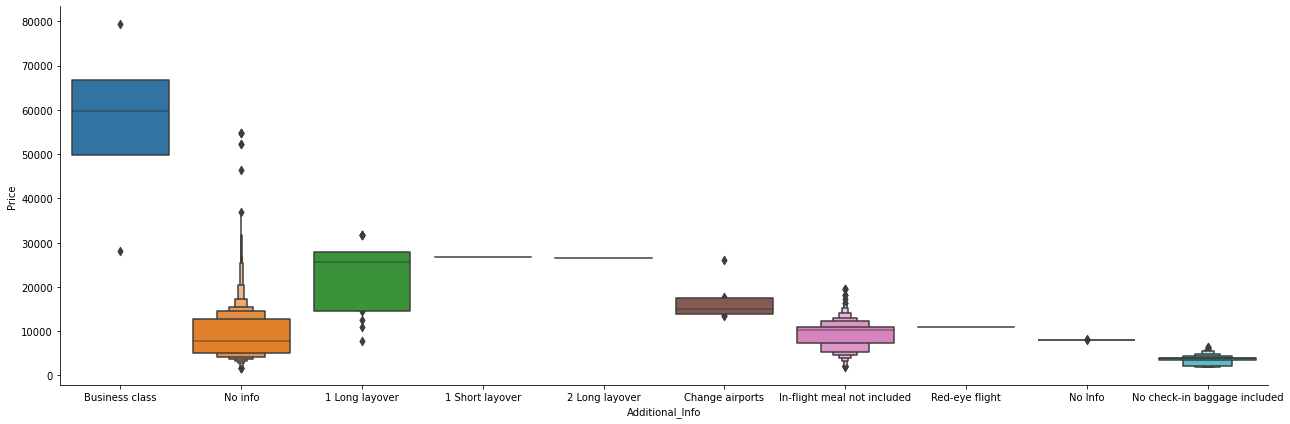

In [162]:
sns.catplot(y='Price',x='Additional_Info',data=train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

### Filtering the Arrival Time

In [163]:
flight_data['Arrival_Time']=flight_data['Arrival_Time'].str.split(' ').str[0]
flight_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


### Anlysing our Stop coloumn

In [164]:
flight_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

## Has nan values

In [165]:
flight_data['Total_Stops'].value_counts()

1 stop      7056
non-stop    4308
2 stops     1520
3 stops       52
4 stops        2
Name: Total_Stops, dtype: int64

In [166]:
## fill by mode
flight_data['Total_Stops']=flight_data['Total_Stops'].fillna('1 stop')

In [167]:
flight_data['Total_Stops'].isnull().sum()

0

In [168]:
flight_data['Total_Stops']=flight_data['Total_Stops'].replace('non-stop','0 stop')

In [169]:
flight_data['Stop'] = flight_data['Total_Stops'].str.split(' ').str[0]
flight_data.drop(['Total_Stops'],axis=1,inplace=True)
flight_data['Stop']=flight_data['Stop'].astype(int)

### Arrival_ time

In [170]:
flight_data['Arrival_Hour'] = flight_data['Arrival_Time'] .str.split(':').str[0]
flight_data['Arrival_Minute'] = flight_data['Arrival_Time'] .str.split(':').str[1]

In [171]:
flight_data['Arrival_Hour']=flight_data['Arrival_Hour'].astype(int)
flight_data['Arrival_Minute']=flight_data['Arrival_Minute'].astype(int)
flight_data.drop(['Arrival_Time'],axis=1, inplace= True)

### Departure Time

In [172]:
flight_data['Departure_Hour'] = flight_data['Dep_Time'] .str.split(':').str[0]
flight_data['Departure_Minute'] = flight_data['Dep_Time'] .str.split(':').str[1]
flight_data['Departure_Hour']= flight_data['Departure_Hour'].astype(int)
flight_data['Departure_Minute']= flight_data['Departure_Minute'].astype(int)
flight_data.drop(['Dep_Time'],axis=1,inplace= True)

In [173]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


## Splitting Route Column

In [174]:
flight_data['Route_1']= flight_data['Route'].str.split('→ ').str[0]
flight_data['Route_2']= flight_data['Route'].str.split('→ ').str[1]
flight_data['Route_3']= flight_data['Route'].str.split('→ ').str[2]
flight_data['Route_4']= flight_data['Route'].str.split('→ ').str[3]
flight_data['Route_5']= flight_data['Route'].str.split('→ ').str[4]

### Filling null values

In [175]:
flight_data['Route_1'].fillna("None",inplace=True)
flight_data['Route_2'].fillna("None",inplace=True)
flight_data['Route_3'].fillna("None",inplace=True)
flight_data['Route_4'].fillna("None",inplace=True)
flight_data['Route_5'].fillna("None",inplace=True)

In [176]:
flight_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


### Dropping columns like Route and Duration

In [177]:
flight_data.drop(['Route'],axis=1, inplace=True)

In [178]:
flight_data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


## Heat map

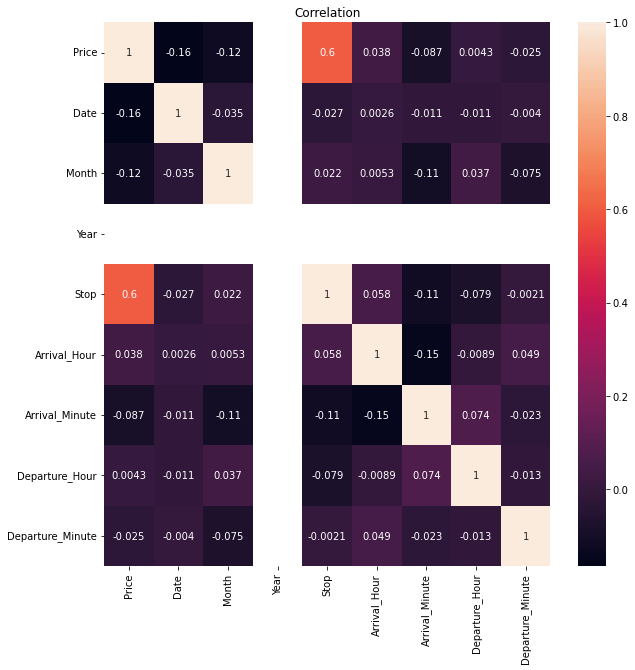

In [179]:
plt.figure(figsize = [10,10])
sns.heatmap(flight_data.corr(), annot = True)
plt.title('Correlation')
plt.show()

### Data Preprocessing

In [180]:
# import LabelEncoder
column=['Airline','Source','Destination','Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5']
from sklearn.preprocessing import LabelEncoder
for col in column:
    le =LabelEncoder()
    flight_data[col]=le.fit_transform(flight_data[col].astype('str'))
flight_data.dtypes

Airline               int32
Source                int32
Destination           int32
Duration             object
Additional_Info       int32
Price               float64
Date                  int32
Month                 int32
Year                  int32
Stop                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Route_1               int32
Route_2               int32
Route_3               int32
Route_4               int32
Route_5               int32
dtype: object

## Duration Column to Minutes In Flight

In [181]:
total_time=[]
for i in flight_data['Duration']:
    total_time.append(i.split(" "))

In [182]:
for i in range(len(total_time)):
    total_time[i][0]=total_time[i][0].replace('h','')
    if len(total_time[i])>1:
        total_time[i][1]=total_time[i][1].replace('m','')


In [184]:
for i in range(len(total_time)):
    if len(total_time[i])>1:
        total_time[i][1]=int(total_time[i][1])
    if(total_time[i][0]=='5m'):
        total_time[i][0]=total_time[i][0].replace('m','')
    else:
        total_time[i][0]= int(total_time[i][0])*60
      

In [186]:
for i in range(len(total_time)):
    if len(total_time[i])>1:
        total_time[i]=total_time[i][0]+total_time[i][1]
    else:
        total_time[i]=total_time[i][0]

In [187]:
total_time

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 1330,
 575,
 600,
 1280,
 325,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 165,
 1515,
 560,
 270,
 925,
 90,
 160,
 550,
 

In [188]:
flight_data['total_time']=0

In [189]:
flight_data['total_time']=total_time

In [190]:
# Dropping Duration
flight_data.drop("Duration",axis=1,inplace=True)

In [191]:
flight_data.head(2)

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,total_time
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4,170
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4,445


## skewness in the data

In [192]:
## skewness in the cleaned Data
flight_data.drop("Price",axis=1).skew().sort_values(ascending=False)

Route_2              1.565331
Destination          1.219846
total_time           0.932262
Airline              0.709024
Route_3              0.553539
Stop                 0.337939
Departure_Minute     0.167476
Date                 0.145025
Arrival_Minute       0.112420
Departure_Hour       0.101579
Year                 0.000000
Month               -0.376135
Arrival_Hour        -0.398849
Source              -0.418071
Route_1             -0.581129
Additional_Info     -1.811516
Route_4             -2.444406
Route_5            -16.777716
dtype: float64

## skew score should lie between 0.5 to -0.5

In [193]:
flight_data.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Price', 'Date',
       'Month', 'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'total_time'],
      dtype='object')

In [194]:
#skewness removal
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer() 
flight_data[['Airline', 'Destination','total_time', 'Additional_Info', 'Route_2', 'Route_3','Route_4', 'Route_5']]=pt.fit_transform(flight_data[['Airline', 'Destination', 'total_time','Additional_Info', 'Route_2', 'Route_3','Route_4', 'Route_5']])

flight_data.skew().sort_values(ascending=False)

Route_5             18.286318
Price                1.898309
Stop                 0.337939
Departure_Minute     0.167476
Date                 0.145025
Arrival_Minute       0.112420
Departure_Hour       0.101579
Route_2              0.052120
Destination          0.043032
Route_3              0.038543
Year                 0.000000
Airline             -0.018630
total_time          -0.036767
Month               -0.376135
Arrival_Hour        -0.398849
Source              -0.418071
Route_1             -0.581129
Additional_Info     -1.414049
Route_4             -2.292439
dtype: float64

In [195]:
flight_data.drop(['Route_5','Additional_Info','Route_4'],axis=1,inplace=True)

In [196]:
flight_data.skew().sort_values(ascending=False)

Price               1.898309
Stop                0.337939
Departure_Minute    0.167476
Date                0.145025
Arrival_Minute      0.112420
Departure_Hour      0.101579
Route_2             0.052120
Destination         0.043032
Route_3             0.038543
Year                0.000000
Airline            -0.018630
total_time         -0.036767
Month              -0.376135
Arrival_Hour       -0.398849
Source             -0.418071
Route_1            -0.581129
dtype: float64

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(flight_data.drop("Price",axis=1).values, i) 
               for i in range(flight_data.drop("Price",axis=1).shape[1])], index=flight_data.drop("Price",axis=1).columns)

Airline              1.108275
Source               1.970429
Destination          2.291010
Date                 1.014578
Month                1.151887
Year                48.534444
Stop                 3.945062
Arrival_Hour         1.035447
Arrival_Minute       1.110110
Departure_Hour       1.048246
Departure_Minute     1.028567
Route_1              1.657621
Route_2              1.149715
Route_3              3.507527
total_time           3.904656
dtype: float64

## will have to drop Year

In [198]:
flight_data.drop("Year",axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(flight_data.drop("Price",axis=1).values, i) 
               for i in range(flight_data.drop("Price",axis=1).shape[1])], index=flight_data.drop("Price",axis=1).columns)

Airline              1.098273
Source               6.867506
Destination          2.093915
Date                 3.337833
Month               11.714817
Stop                 8.886797
Arrival_Hour         4.415702
Arrival_Minute       3.123033
Departure_Hour       5.394614
Departure_Minute     2.635885
Route_1              6.143665
Route_2              1.133864
Route_3              3.419486
total_time           3.881701
dtype: float64

In [57]:
# flight_data.drop("Month",axis=1,inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# pd.Series([variance_inflation_factor(flight_data.drop("Price",axis=1).values, i) 
#                for i in range(flight_data.drop("Price",axis=1).shape[1])], index=flight_data.drop("Price",axis=1).columns)

## Scaling the data

In [199]:
# scaling the features
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Features = pd.DataFrame(SC.fit_transform(flight_data.drop("Price",axis=1)), columns=features.columns)

## splitting again train and test Set

In [203]:
columns=Features.columns
for i in columns:
    flight_data[i]=Features[i]

In [204]:
test=flight_data[10268::]
train=flight_data[0:10268]
test.head()

,Airline,Source,Destination,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,total_time
0,-0.304660,-1.641279,1.742200,NaN,1.269216,-1.460032,-1.216378,-1.807385,-0.882245,1.664979,-0.236960,-1.649780,0.398660,1.250917,-1.040431
1,-1.415071,0.875292,-1.354438,NaN,-1.463334,0.257754,1.851299,-0.066218,-0.582093,-1.314033,1.349734,0.004924,1.574420,-2.395235,-0.017087
2,0.133669,0.036435,0.006983,NaN,-0.512882,1.116647,1.851299,-1.372093,0.018210,-0.613089,0.027489,0.832275,2.066263,-0.905547,1.087579
3,-0.304660,0.875292,-1.354438,NaN,-0.156462,0.257754,0.317460,1.384754,0.318362,0.964035,-1.030307,0.004924,2.191192,-1.249142,-0.362732
4,-0.304660,-1.641279,1.742200,NaN,-1.463334,-1.460032,0.317460,1.094559,0.618513,0.613563,1.349734,-1.649780,2.191192,-0.055194,-0.503856


### Splitting Dependent and Independent Variable

In [205]:
features = train.drop(["Price"],axis=1)
target = train["Price"]

In [62]:
#Importing necessary libraries
from sklearn import datasets, linear_model, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [63]:
def model_building(Features,target,model):
    Maximum_Accuracy=0

    test_size=[0.2,0.25,0.3]

    for j in test_size:
        for i in range(200):
            x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=j,
                                                          random_state=i)

        model.fit(x_train,y_train)
        pred= model.predict(x_test)
        acc=r2_score(y_test,pred)
        check=model.predict(x_train)
        check_acc=r2_score(y_train,check)

        if acc>Maximum_Accuracy:
            Maximum_Accuracy=acc
            print("R-square",Maximum_Accuracy,"Train set R Squared",check_acc,'Random state',i,'test_size',j)

### LINEAR REGRESSION

In [64]:
model_building(features,target,LinearRegression())

R-square 0.5118182105034634 Train set R Squared 0.4673588395455226 Random state 199 test_size 0.2
R-square 0.5194758789967503 Train set R Squared 0.46199729018725233 Random state 199 test_size 0.25


In [64]:
# creating empty list that will help us in the end to judge the best model
model_name=[]
mse=[]
mae=[]
R_sq=[]
rmse=[]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.2,random_state=199)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr.score(x_train,y_train))

0.4673588395455227


In [66]:
print('MSE:',mean_squared_error(lr_pred,y_test))
print('MAE:',mean_absolute_error(lr_pred,y_test))
print('r2_score:',r2_score(lr_pred,y_test))
print('RMSE Score',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))
mse.append(mean_squared_error(lr_pred,y_test))
mae.append(mean_absolute_error(lr_pred,y_test))
R_sq.append(r2_score(lr_pred,y_test))
model_name.append("linear_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

MSE: 9556295.376814783
MAE: 2340.975491836874
r2_score: 0.06215998641006215
RMSE Score 3091.325828316191


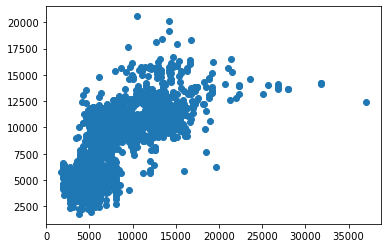

In [67]:
plt.scatter(x=y_test,y=lr_pred)

# RIDGE REGRESSION

In [65]:
model_building(features,target,Ridge())

R-square 0.5118241316860037 Train set R Squared 0.4673587938119156 Random state 199 test_size 0.2
R-square 0.5194736548817787 Train set R Squared 0.46199724017725907 Random state 199 test_size 0.25


In [68]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.25,random_state=199)
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'solver':['auto','svd','cholesky','lsqr']}
ridge=Ridge()
RR=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error')
RR.fit(x_train,y_train)
print(RR.best_params_)

{'alpha': 20, 'solver': 'auto'}


In [69]:
rr=Ridge(alpha=20,solver='auto')
rr.fit(x_train,y_train)
rr_pred=rr.predict(x_test)
print('R2_score:',r2_score(y_test,rr_pred))
print('mse:',metrics.mean_squared_error(y_test,rr_pred))
print('mae:',metrics.mean_absolute_error(y_test,rr_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))
mse.append(mean_squared_error(rr_pred,y_test))
mae.append(mean_absolute_error(rr_pred,y_test))
R_sq.append(r2_score(y_test,rr_pred))
model_name.append("ridge_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,rr_pred)))

R2_score: 0.5194552868341817
mse: 9600174.909416117
mae: 2322.3241596354037
rmse: 3098.4149027230224


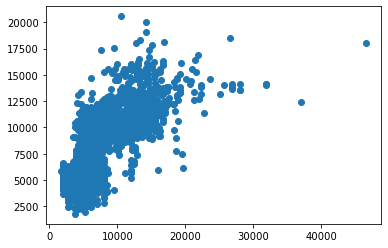

In [70]:
plt.scatter(x=y_test,y=rr_pred)

# RANDOM FOREST

In [66]:
model_building(features,target,RandomForestRegressor())

R-square 0.8479912810682024 Train set R Squared 0.9541576831855657 Random state 199 test_size 0.2
R-square 0.8492550509856466 Train set R Squared 0.9535632558314369 Random state 199 test_size 0.25


In [110]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.25,random_state=199)
model=RandomForestRegressor()
param_grid = { "n_estimators"      : [800,1000,1200,1400],
            "max_features"      : ["auto", "sqrt"],
              'max_depth'       : [15,17,19,21],
            "min_samples_split" : [2,3, 5, 7, 9],
            "bootstrap": [True, False]
            }
grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 1200}


In [206]:
RF=RandomForestRegressor(n_estimators= 1200,max_features= "auto",max_depth=15,min_samples_split = 3,bootstrap=True)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2_score:',r2_score(y_test,RF_pred))
print('mse:',metrics.mean_squared_error(y_test,RF_pred))
print('mae:',metrics.mean_absolute_error(y_test,RF_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

R2_score: 0.8723448777050987
mse: 2550254.8847958674
mae: 1034.6970267477802
rmse: 1596.9517477982442


In [72]:
mse.append(mean_squared_error(RF_pred,y_test))
mae.append(mean_absolute_error(RF_pred,y_test))
R_sq.append(r2_score(y_test,RF_pred))
model_name.append("Random_forest_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,RF_pred)))

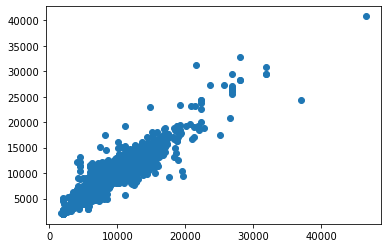

In [73]:
plt.scatter(x=y_test,y=RF_pred)

# Xgboost Regressor

In [67]:
model_building(features,target,XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42))

R-square 0.8725688192900138 Train set R Squared 0.9348233064021544 Random state 199 test_size 0.2
R-square 0.8743437591068397 Train set R Squared 0.9348783419653229 Random state 199 test_size 0.25


In [114]:
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.25,random_state=199)
xgb1 = XGBRegressor(verbosity = 0, random_state=42)
parameters ={
        'objective':['reg:linear'],
         'max_depth': [1,2,3,4,5,6,7,8,9,10],
         'colsample_bylevel':[0.2,0.5,0.6,1],
         'learning_rate':[0.01,0.1,0.3,0.2,1],
         'n_estimators':[50,100,150,200]
                    }

xgb_grid = GridSearchCV(xgb1,parameters)

xgb_grid.fit(x_train, y_train)
print(xgb_grid.best_params_)

{'colsample_bylevel': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'objective': 'reg:linear'}


In [74]:
Xg=XGBRegressor(objective ='reg:linear', verbosity = 0, random_state=42, colsample_bylevel=1,learning_rate=0.1 ,max_depth= 7,n_estimators= 150)
Xg.fit(x_train,y_train)
Xg_pred=Xg.predict(x_test)

In [75]:
print('R2_score:',r2_score(y_test,Xg_pred))
print('mse:',metrics.mean_squared_error(y_test,Xg_pred))
print('mae:',metrics.mean_absolute_error(y_test,Xg_pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

R2_score: 0.859526426304367
mse: 2806337.9758034903
mae: 1047.9114138547855
rmse: 1675.2128150785768


In [76]:
mse.append(mean_squared_error(Xg_pred,y_test))
mae.append(mean_absolute_error(Xg_pred,y_test))
R_sq.append(r2_score(y_test,Xg_pred))
model_name.append("XGboost_regression")
rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Xg_pred)))

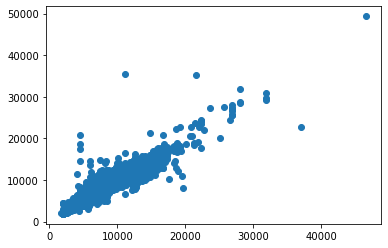

In [77]:
plt.scatter(x=y_test,y=Xg_pred)

# comparision

In [78]:
data = list(zip(model_name,mse,mae,rmse,R_sq))                                           
df = pd.DataFrame(data,columns=["Model","Mean_Sq_Error","Mean_Absolute_Error","Root Mean Squared Error",'R_sq'])                    #Creating DataFrame    
df

,Model,Mean_Sq_Error,Mean_Absolute_Error,Root Mean Squared Error,R_sq
0,linear_regression,9.556295e+06,2340.975492,3091.325828,0.062160
1,ridge_regression,9.600175e+06,2322.324160,3098.414903,0.519455
2,Random_forest_regression,2.527676e+06,1033.168185,1589.866652,0.873475
3,XGboost_regression,2.806338e+06,1047.911414,1675.212815,0.859526


# Conclusion: We are best results with random Forest Regressor
thus we will pick the Random Forest model

In [207]:
#pickle file of the model
import pickle
# # saved the trained model in file with given name
pickle_out = open("flight_price.pkl","wb") # name of my pickle file , wb -write
pickle.dump(RF, pickle_out)
pickle_out.close()
# loading the pickeled model
pickle_in = open("flight_price.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
pd.DataFrame([trained_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,2557,2558,2559,2560,2561,2562,2563,2564,2565,2566
Predicted,6558.508439,9305.191777,8741.735404,9275.188244,3309.558282,11289.921784,7936.350624,8621.402527,13654.674266,4081.779291,...,10825.57456,9235.870039,8454.070047,6302.585471,12215.176622,23649.727629,3952.765698,6603.831097,12249.029684,8298.376864
Original,6426.000000,8452.000000,8891.000000,12681.000000,3175.000000,9314.000000,6785.000000,5281.000000,13727.000000,4441.000000,...,11264.00000,9345.000000,7664.000000,5706.000000,11989.000000,14815.000000,3383.000000,7451.000000,9905.000000,7384.000000


## Case Study Completed

In [209]:
# predicting for test dataset

pickle_in = open("flight_price.pkl","rb") # rb -> read the pickel file
trained_model = pickle.load(pickle_in)
data=pd.DataFrame([trained_model.predict(test.drop("Price",axis=1))],index=["Predicted"])

In [210]:
# saving the dataframe
data.to_csv('flight_price_predicted.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Predicted,5194.565054,7220.279794,13667.485114,6200.619567,14556.003161,3869.750487,12023.023547,22897.622893,12362.902395,8247.01139,...,9335.768684,9992.308736,6411.9645,12511.350182,14594.966901,4271.530702,7263.342175,13615.07655,4460.455343,9859.712316
